In [1]:
#1. IMPORT LIBRARIES
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [3]:
#2. LOAD DATASET
file_path = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/Waste_Management_and_Recycling_India.csv" 
df = pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/Waste_Management_and_Recycling_India.csv")

In [4]:
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (850, 13)


,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


In [5]:
# 3. BASIC INFO & SUMMARY
# =============================
print("\n--- Info ---")
df.info()

print("\n--- Summary statistics ---")
display(df.describe())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City/District                      850 non-null    object
 1   Waste Type                         850 non-null    object
 2   Waste Generated (Tons/Day)         850 non-null    int64 
 3   Recycling Rate (%)                 850 non-null    int64 
 4   Population Density (People/km²)    850 non-null    int64 
 5   Municipal Efficiency Score (1-10)  850 non-null    int64 
 6   Disposal Method                    850 non-null    object
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64 
 8   Awareness Campaigns Count          850 non-null    int64 
 9   Landfill Name                      850 non-null    object
 10  Landfill Location (Lat, Long)      850 non-null    object
 11  Landfill Capacity (Tons)           850 non-null    int64 

,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Capacity (Tons),Year
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,5262.249412,57.076471,13489.705882,7.400000,2778.458824,9.904706,58934.617647,2021.000000
std,2786.984735,16.129994,6631.081494,1.722162,1276.325630,6.070772,19413.627292,1.415046
min,511.000000,30.000000,2335.000000,5.000000,503.000000,0.000000,22690.000000,2019.000000
25%,2865.750000,43.000000,7927.000000,6.000000,1647.500000,5.000000,45575.000000,2020.000000
50%,5283.000000,56.000000,12579.500000,7.000000,2853.000000,10.000000,61038.500000,2021.000000
75%,7757.250000,71.000000,19087.000000,9.000000,3855.000000,15.000000,71127.000000,2022.000000
max,9980.000000,85.000000,24032.000000,10.000000,4999.000000,20.000000,98646.000000,2023.000000



--- Missing Values ---


,Missing Values,Percentage


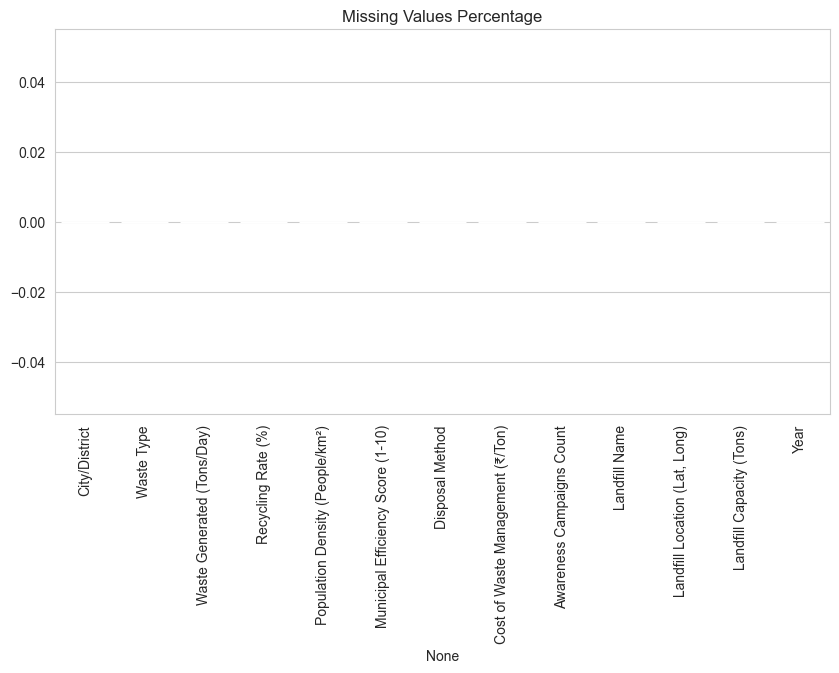

In [10]:
#4. MISSING VALUES ANALYSIS
# =============================
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_data, "Percentage": missing_percent})
print("\n--- Missing Values ---")
display(missing_df[missing_df["Missing Values"] > 0])

# Visualize missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=90)
plt.title("Missing Values Percentage")
plt.show()


--- Categorical Columns ---
['City/District', 'Waste Type', 'Disposal Method', 'Landfill Name', 'Landfill Location (Lat, Long)']


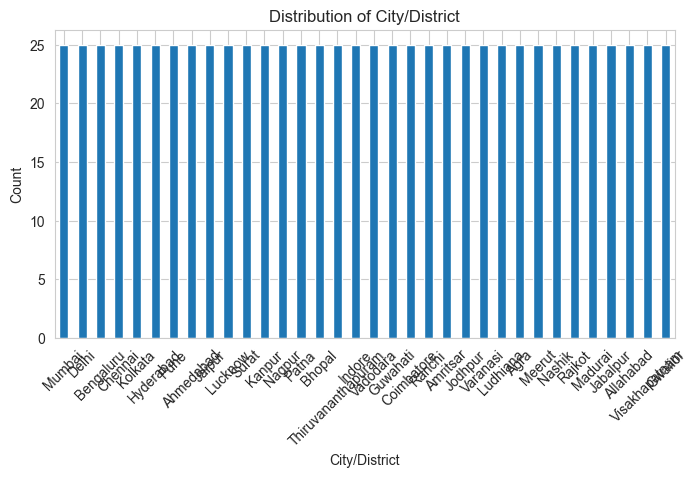

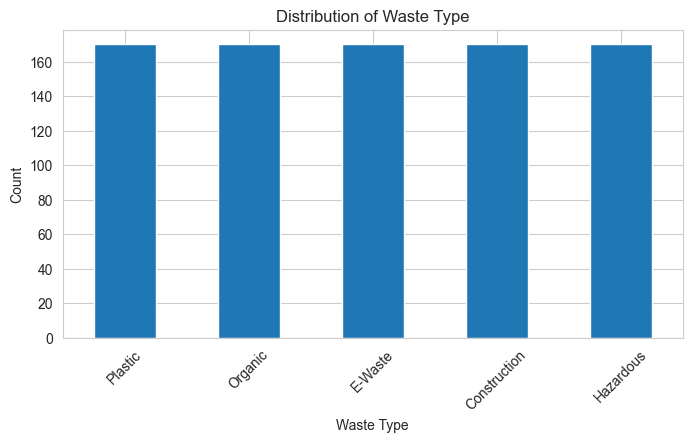

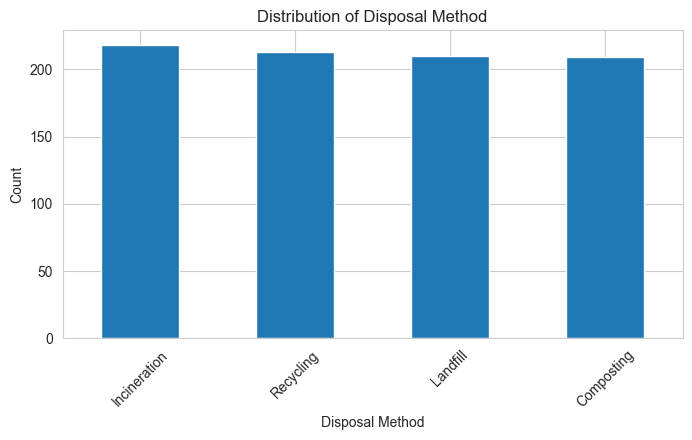

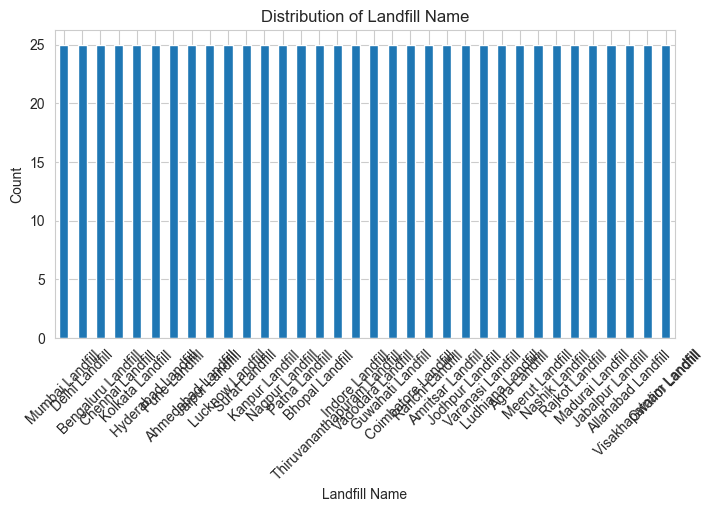

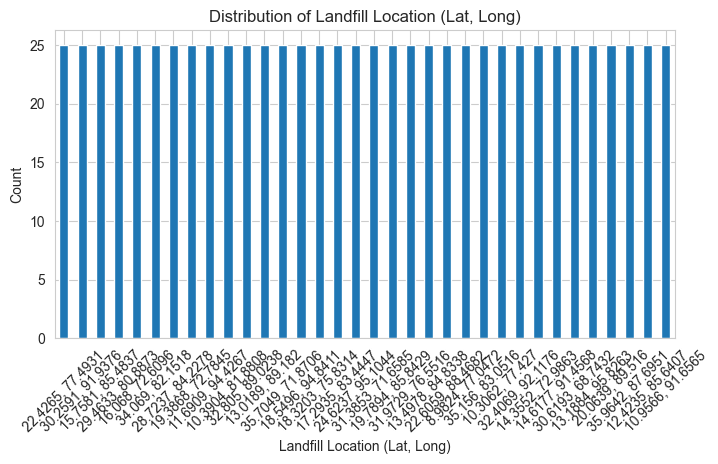

In [11]:
# 5. CATEGORICAL FEATURES
# =============================
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n--- Categorical Columns ---")
print(categorical_cols.tolist())

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


--- Numerical Columns ---
['Waste Generated (Tons/Day)', 'Recycling Rate (%)', 'Population Density (People/km²)', 'Municipal Efficiency Score (1-10)', 'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count', 'Landfill Capacity (Tons)', 'Year']


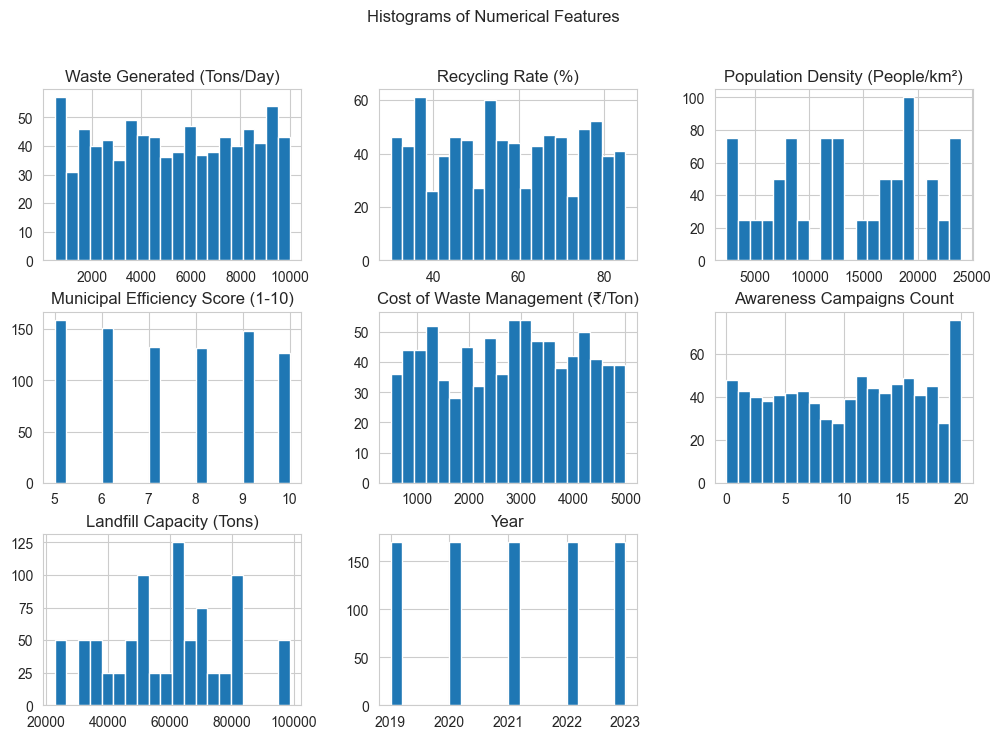

In [12]:
# 6. NUMERICAL FEATURES
# =============================
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print("\n--- Numerical Columns ---")
print(numerical_cols.tolist())

df[numerical_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

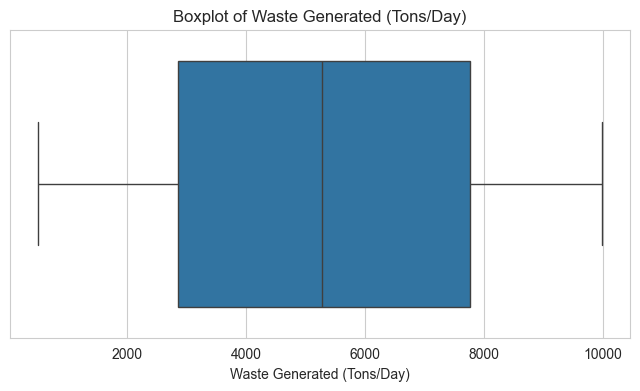

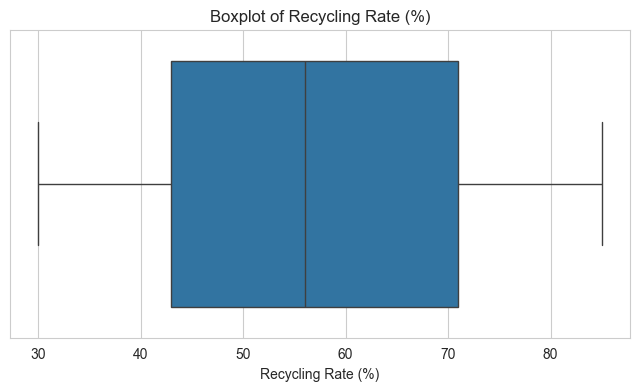

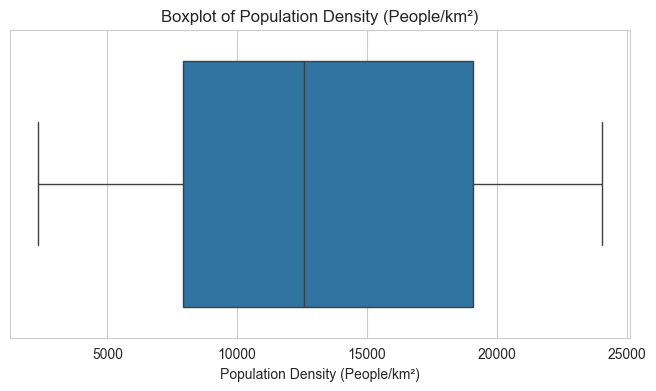

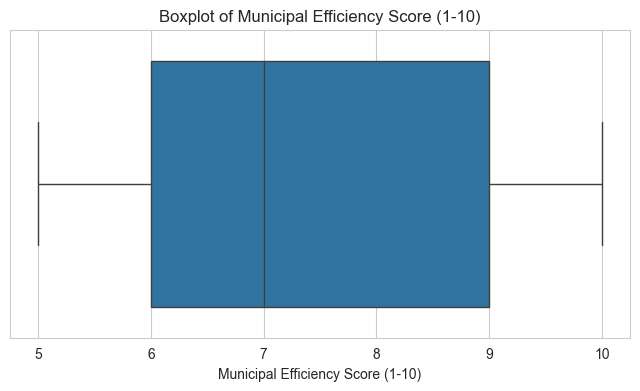

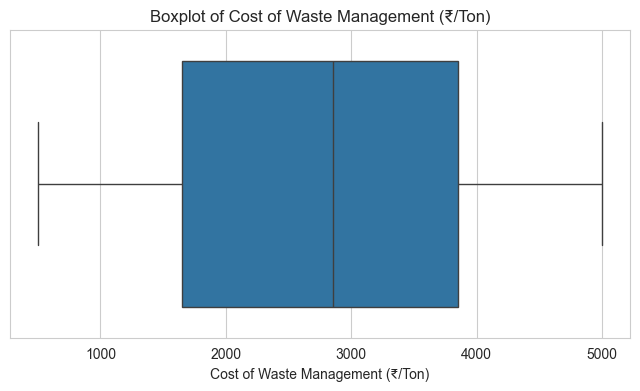

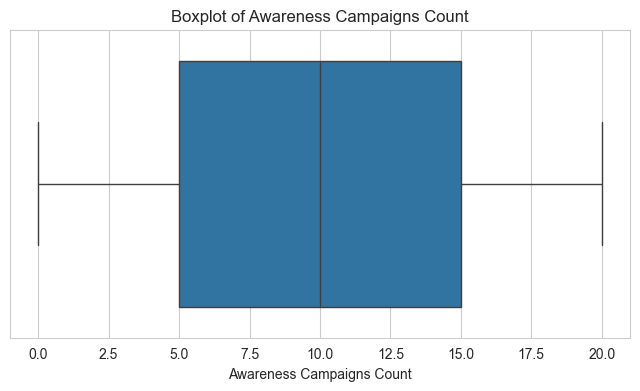

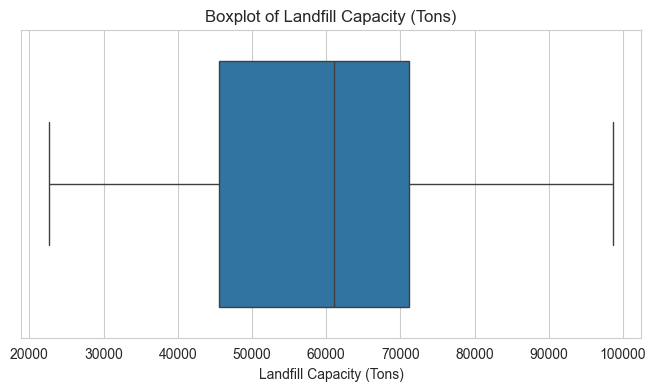

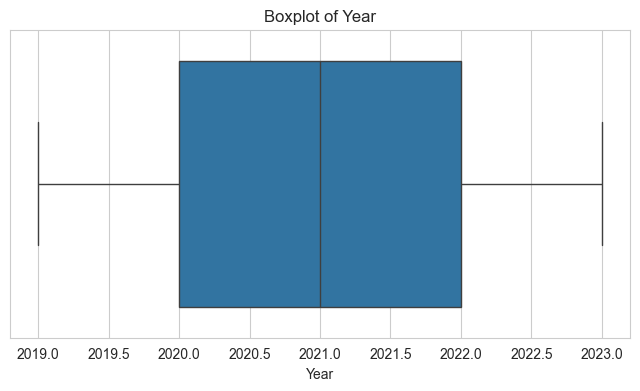

In [13]:
# 7. OUTLIER DETECTION (Boxplots)
# =============================
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


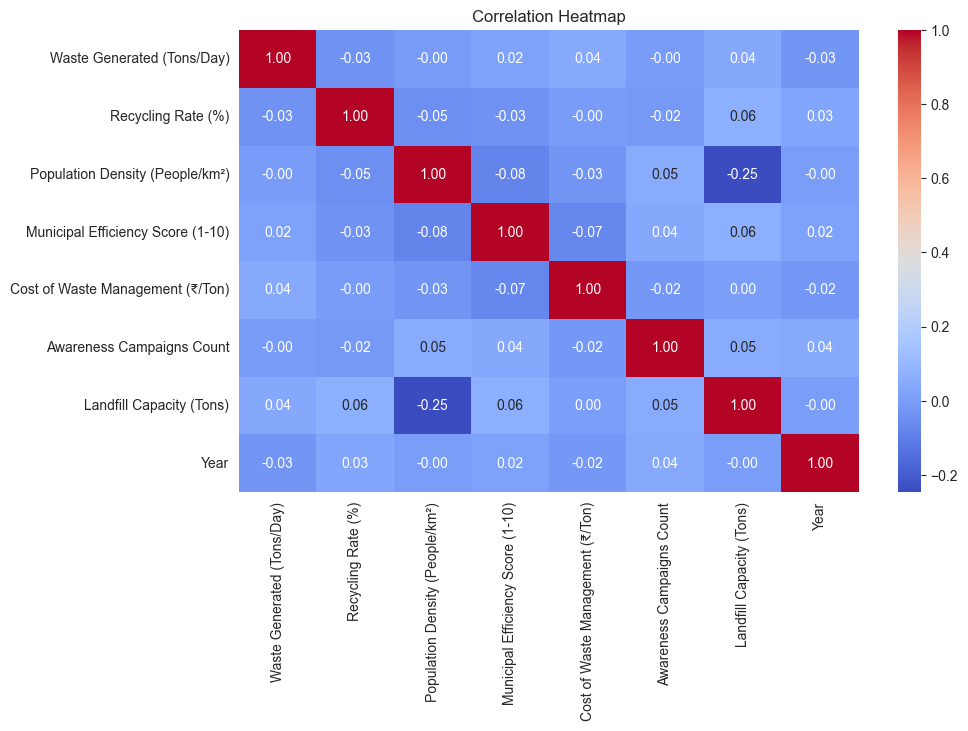

In [14]:
# 8. CORRELATION ANALYSIS
# =============================
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


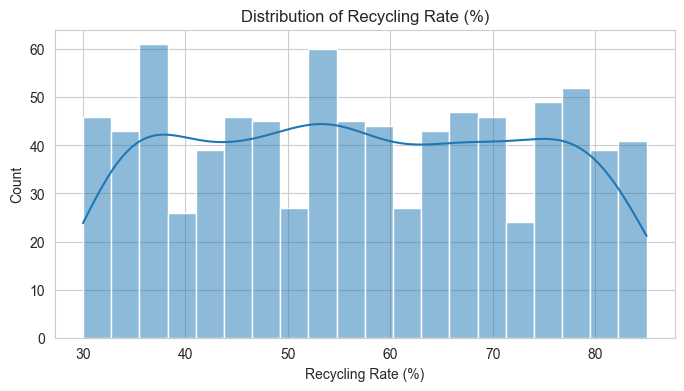

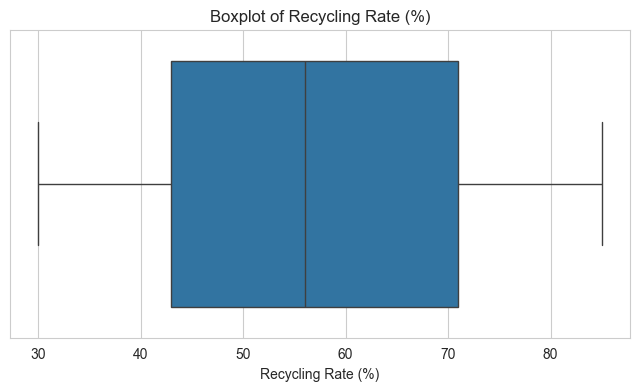

In [15]:
# 9. TARGET VARIABLE ANALYSIS
# =============================
target = "Recycling Rate (%)"

plt.figure(figsize=(8,4))
sns.histplot(df[target], kde=True, bins=20)
plt.title(f"Distribution of {target}")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df[target])
plt.title(f"Boxplot of {target}")
plt.show()

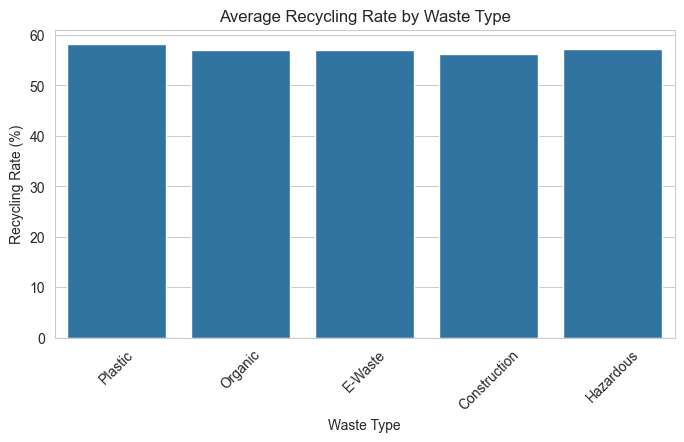

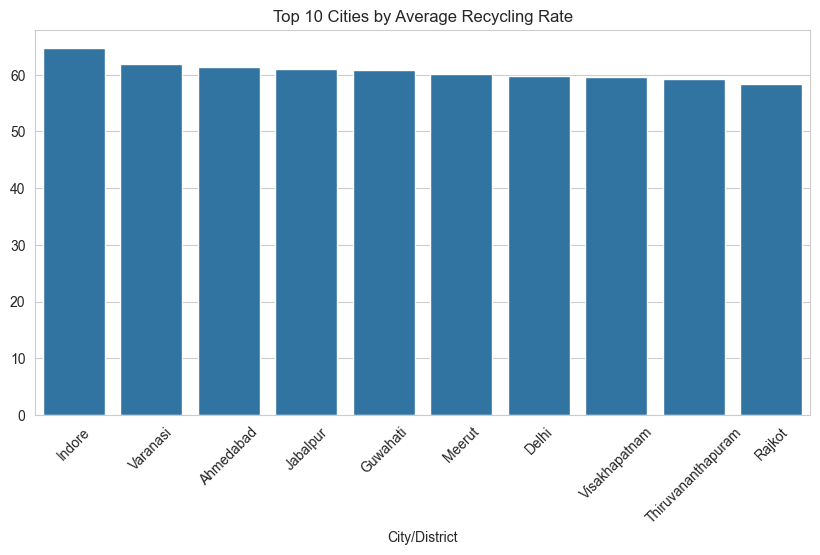

In [18]:
# 10. RELATIONSHIPS & INSIGHTS
# =============================
# Recycling Rate by Waste Type
plt.figure(figsize=(8,4))
sns.barplot(x="Waste Type", y=target, data=df, estimator=np.mean, errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Recycling Rate by Waste Type")
plt.show()

# Recycling Rate by City
top_cities = df.groupby("City/District")[target].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Average Recycling Rate")
plt.show()

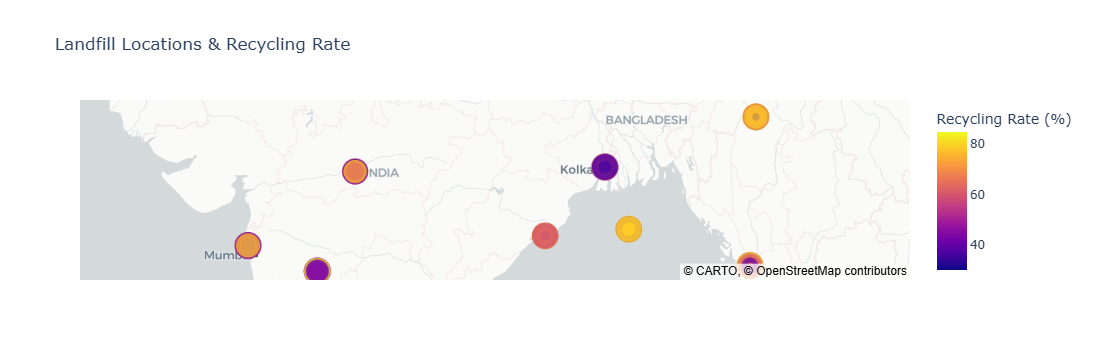

In [27]:
#11. GEO-VISUALIZATION (Optional)
# =============================
if "Landfill Location (Lat, Long)" in df.columns:
    lat_lon = df["Landfill Location (Lat, Long)"].str.split(",", expand=True)
    df["Latitude"] = lat_lon[0].astype(float)
    df["Longitude"] = lat_lon[1].astype(float)

fig = px.scatter_map(
    df,
    lat="Latitude",
    lon="Longitude",
    color=target,
    size="Waste Generated (Tons/Day)",
    hover_name="City/District",
    zoom=4,
    map_style="carto-positron",
    title="Landfill Locations & Recycling Rate"
)
fig.show()